In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Muat data

In [11]:
try:
  data = pd.read_csv("ai_job_dataset.csv")
  print("Berhasil memuat data")
except:
  print("Gagal memuat data")


Berhasil memuat data


# Cek data

In [12]:
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### Cek data kosong

In [13]:
data.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


In [14]:
# ubah format tanggal
df = pd.DataFrame(data)
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['posting_duration_days'] = (df['application_deadline'] - df['posting_date']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

# Visualisasi Data

## Job Title

In [17]:
# mendapatkan kemunculan setiap job
job_title_counts = data['job_title'].value_counts()
job_title_counts

,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


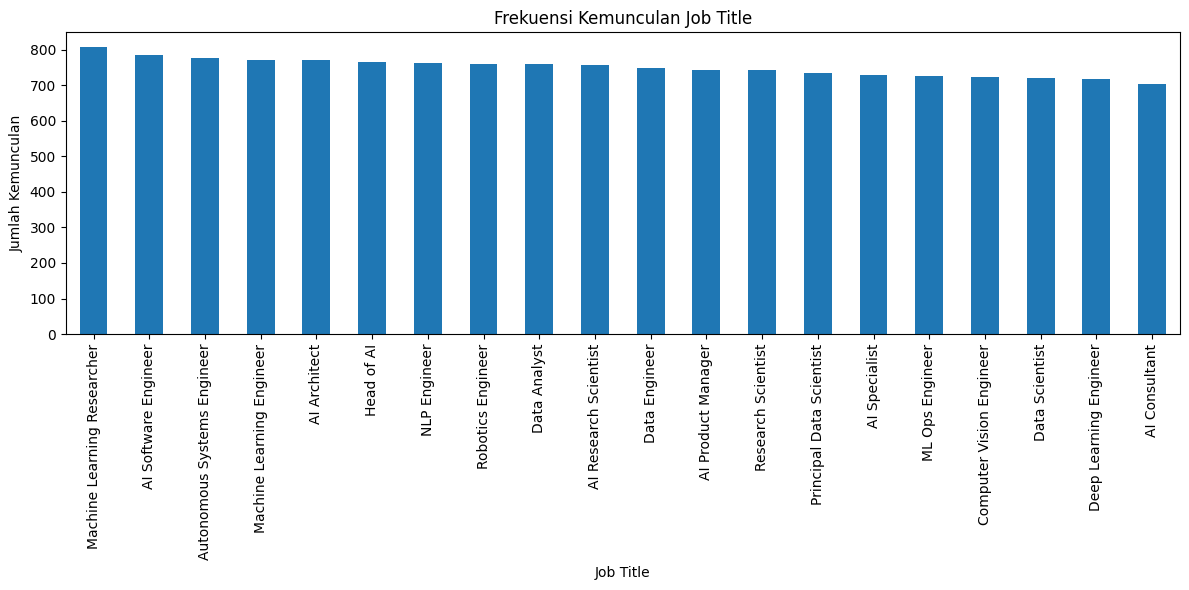

In [23]:
# bar plot
plt.figure(figsize=(12, 6))
job_title_counts.plot(kind='bar')
plt.title('Frekuensi Kemunculan Job Title')
plt.xlabel('Job Title')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Plot ini menampilkan 20 judul pekerjaan teratas dalam dataset, berdasarkan frekuensi kemunculannya. Pekerjaan paling dominan adalah *Machine Learning Researcher* dengan jumlah 808, diikuti oleh *AI Software Engineer* dan *Autonomous Systems Engineer*. Rentang frekuensi judul-judul pekerjaan ini cukup sempit (sekitar 700–800), yang menunjukkan bahwa tidak ada satu peran yang terlalu mendominasi—permintaan relatif merata di antara peran-peran terpopuler.

Variasi judul mencerminkan ekosistem yang luas dalam bidang AI dan Data Science. Peran-peran tersebut mencakup bidang riset (*Research Scientist*, *AI Researcher*), engineering (*ML Engineer*, *Computer Vision Engineer*, *Robotics Engineer*), analisis (*Data Analyst*, *Data Scientist*), hingga manajemen dan konsultasi (*AI Architect*, *Product Manager*, *AI Consultant*). Ini menunjukkan bahwa industri AI membutuhkan tenaga kerja dari berbagai latar belakang keahlian, mulai dari teknis hingga strategis.



## Salary USD

In [26]:
# Menampilkan statistic Salary USD
data["salary_usd"].describe()


,salary_usd
count,15000.000000
mean,115348.965133
std,60260.940438
min,32519.000000
25%,70179.750000
50%,99705.000000
75%,146408.500000
max,399095.000000


### Median & Modus sarlary

In [27]:
# median salary
print("==median salary==")
print(data["salary_usd"].median())

# modus salary
print("==modus salary==")
print(data["salary_usd"].mode())

==median salary==
99705.0
==modus salary==
0    51000
1    67253
Name: salary_usd, dtype: int64


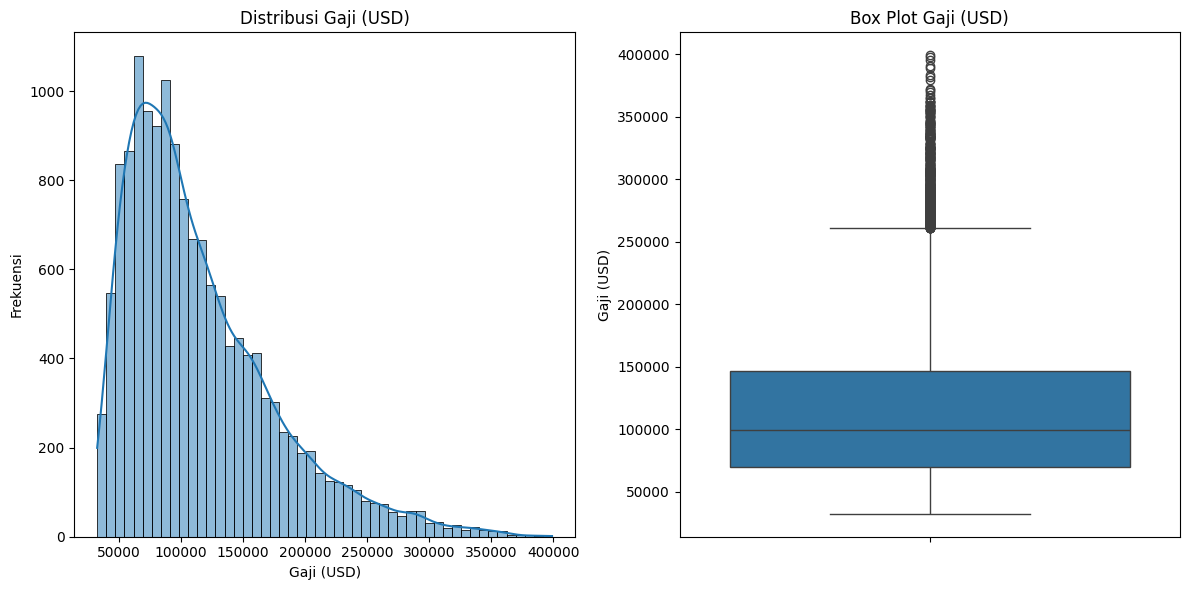

In [28]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['salary_usd'], kde=True, bins=50)
plt.title('Distribusi Gaji (USD)')
plt.xlabel('Gaji (USD)')
plt.ylabel('Frekuensi')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary_usd'])
plt.title('Box Plot Gaji (USD)')
plt.ylabel('Gaji (USD)')

plt.tight_layout()
plt.show()

Distribusi gaji dalam dataset menunjukkan pola **miring ke kanan (right-skewed)**, dengan sebagian besar data terkonsentrasi pada kisaran **\$50.000–\$150.000**, dan puncak frekuensi di sekitar **\$70.000–\$100.000**. Ini berarti mayoritas individu menerima gaji di rentang tersebut, sementara hanya sedikit yang bergaji sangat tinggi. Nilai gaji berkisar dari **\$25.000 hingga lebih dari \$400.000**, tetapi sebaran data utama berada di bawah **\$200.000**, sebagaimana diperlihatkan oleh histogram dan kurva KDE. Pola ini selaras dengan ditemukannya dua nilai modus yang relatif rendah, serta menggambarkan distribusi yang tidak simetris.

Box plot mendukung temuan ini, dengan **median gaji sekitar \$100.000**, dan **IQR (rentang antar-kuartil)** antara **\$70.000 dan \$150.000**, yang menampung 50% data tengah. Kumis atas dan bawah menunjukkan batas data yang tidak dianggap outlier, masing-masing berkisar di sekitar **\$30.000–\$270.000**. Titik-titik di atas kumis atas menandakan adanya **outlier**, yaitu individu-individu dengan gaji sangat tinggi yang secara signifikan berbeda dari mayoritas. Oleh karena distribusinya tidak normal dan dipengaruhi outlier, **median lebih representatif** daripada rata-rata untuk menggambarkan nilai pusat gaji.


## Salary curency

In [39]:
# menghitung salary curency
salary_currency_counts = data['salary_currency'].value_counts()
salary_currency_counts

,count
salary_currency,
USD,11957
EUR,2314
GBP,729


/tmp/ipython-input-44-3323060392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=salary_currency_counts.index, y=salary_currency_counts.values, palette='plasma')


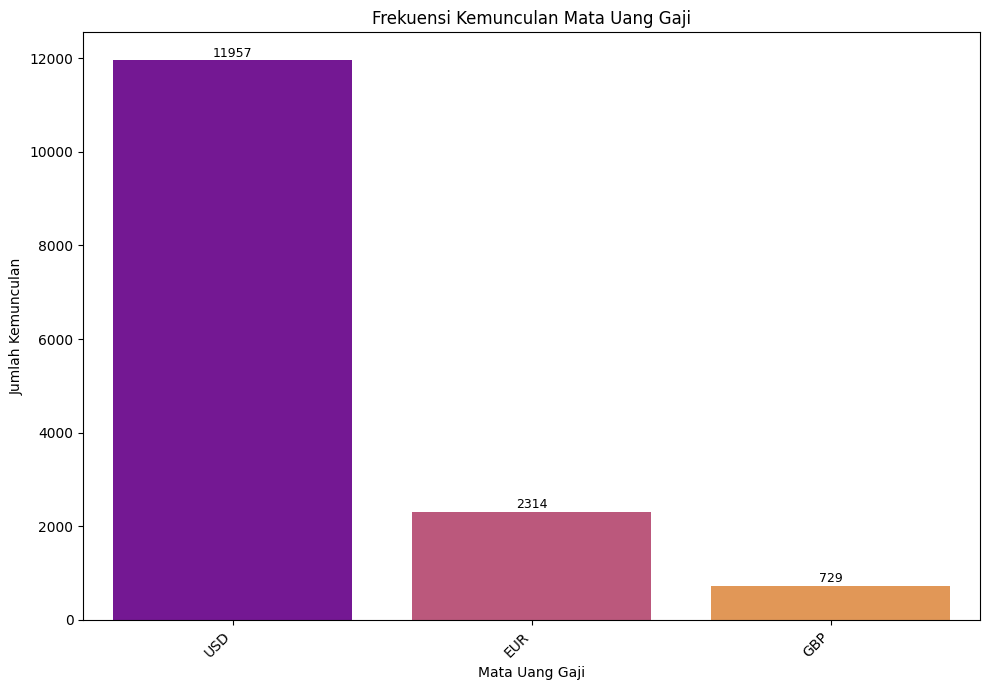

In [44]:
# plot salary currency
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=salary_currency_counts.index, y=salary_currency_counts.values, palette='plasma')

plt.title('Frekuensi Kemunculan Mata Uang Gaji')
plt.xlabel('Mata Uang Gaji')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menambahkan angka di atas bar (opsional)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

plt.show()

Plot ini menunjukkan bahwa **USD (United States Dollar)** merupakan mata uang yang paling dominan dalam dataset, dengan **11.957 kemunculan**, jauh melampaui **EUR (Euro)** sebanyak **2.314 kali** dan **GBP (British Pound Sterling)** sebanyak **729 kali**. Hal ini mengindikasikan bahwa sebagian besar data gaji dinyatakan dalam USD, yang mungkin mencerminkan fokus data pada perusahaan berbasis di Amerika Serikat atau penggunaan USD sebagai standar internasional dalam pelaporan gaji. Dominasi ini penting diperhatikan saat membandingkan nilai gaji lintas mata uang atau negara.


## Experience level

In [29]:
# count experience level
experience_level_counts = data['experience_level'].value_counts()
experience_level_counts

,count
experience_level,
MI,3781
EX,3760
SE,3741
EN,3718


MI: Mid-level (Tingkat Menengah)

EX: Executive (Tingkat Eksekutif/Direktur)

SE: Senior-level (Tingkat Senior)

EN: Entry-level (Tingkat Pemula)

/tmp/ipython-input-32-497009320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=experience_level_counts.index, y=experience_level_counts.values, palette='Blues_d')


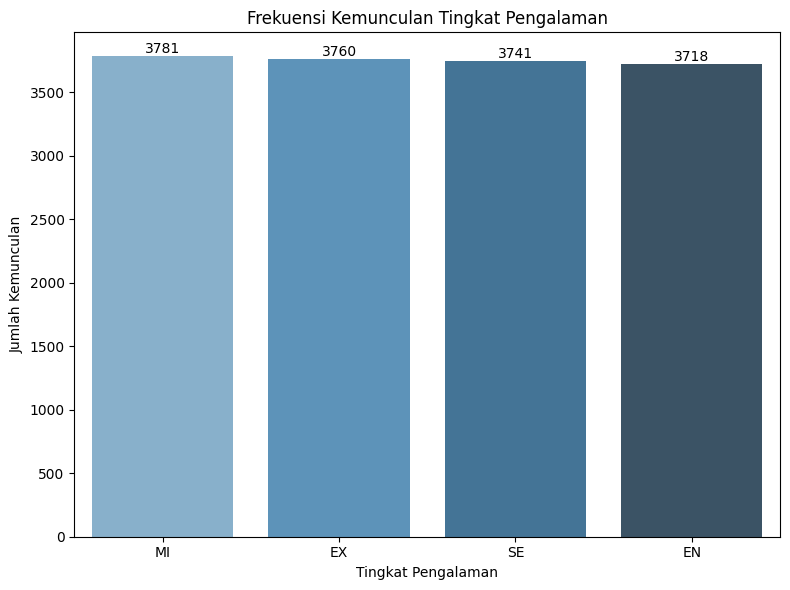

In [32]:
# plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=experience_level_counts.index, y=experience_level_counts.values, palette='Blues_d')

plt.title('Frekuensi Kemunculan Tingkat Pengalaman')
plt.xlabel('Tingkat Pengalaman')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=0)
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.show()

Plot ini menunjukkan distribusi jumlah kemunculan dari empat tingkat pengalaman utama dalam dataset, yaitu Entry-level (EN), Mid-level (MI), Senior-level (SE), dan Executive (EX). Meskipun terdapat sedikit perbedaan angka, distribusinya tergolong sangat merata. Tingkat Mid-level muncul paling sering dengan 3781 kemunculan, disusul oleh Executive (3760) dan Senior-level (3741). Sementara itu, Entry-level memiliki jumlah kemunculan paling rendah yaitu 3718. Selisih antara kategori terbanyak dan tersedikit hanya 63, yang menandakan bahwa representasi tiap tingkat pengalaman hampir seimbang.

Keseimbangan ini memiliki implikasi penting. Jika data ini berasal dari lowongan pekerjaan, maka hal ini mengindikasikan bahwa permintaan pasar tenaga kerja tersebar cukup merata di semua level—dari pemula hingga eksekutif.

## Employment type

In [33]:
# count employment type
employment_type_counts = data['employment_type'].value_counts()
employment_type_counts

,count
employment_type,
FT,3812
FL,3758
CT,3721
PT,3709


FT: Full-Time (Penuh Waktu)

FL: Freelance (Pekerja Lepas/Kontrak Independen)

CT: Contract (Pekerjaan Kontrak)

PT: Part-Time (Paruh Waktu)

/tmp/ipython-input-34-3589264707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, palette='viridis')


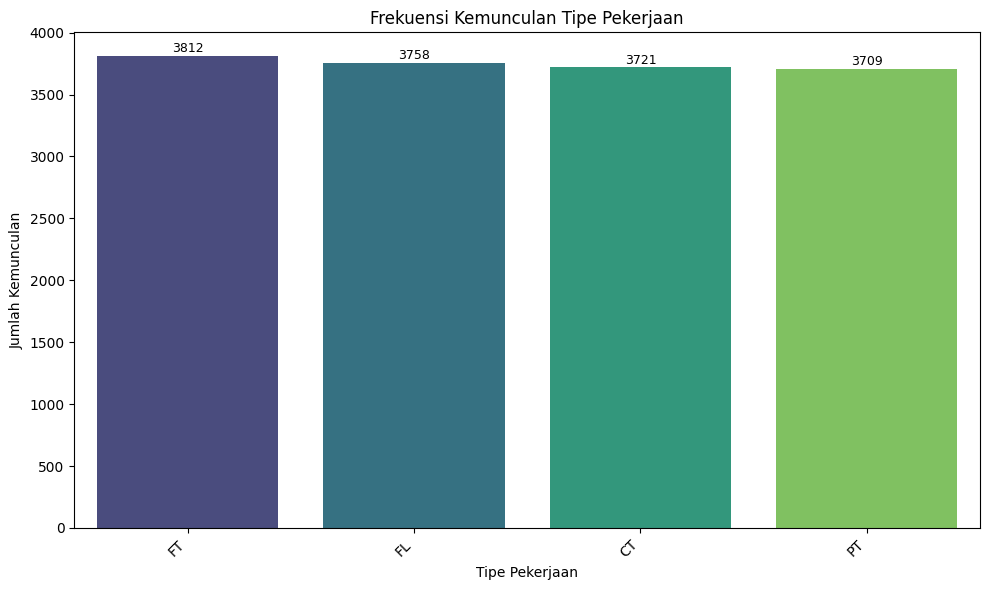

In [34]:
# plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, palette='viridis')

plt.title('Frekuensi Kemunculan Tipe Pekerjaan')
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

plt.show()

Plot ini menggambarkan distribusi jumlah kemunculan dari empat tipe pekerjaan utama dalam dataset: Full-Time (FT), Freelance (FL), Contract (CT), dan Part-Time (PT). Meskipun Full-Time memiliki jumlah tertinggi (3812), diikuti oleh Freelance (3758), Contract (3721), dan Part-Time (3709), perbedaan antar kategori sangat kecil. Hal ini menunjukkan bahwa semua tipe pekerjaan memiliki representasi yang hampir setara, tanpa adanya dominasi yang mencolok dari salah satu jenis pekerjaan.

Keseimbangan ini memberikan indikasi bahwa dataset mencakup spektrum industri atau sumber data yang luas, di mana berbagai bentuk hubungan kerja (penuh waktu, lepas, kontrak, dan paruh waktu) semuanya relevan dan dibutuhkan. Jika ini merupakan data lowongan kerja, maka pasar tenaga kerja yang direpresentasikan cenderung menawarkan peluang yang cukup merata bagi berbagai tipe pekerjaan, menjadikan dataset ini ideal untuk analisis yang adil terhadap tipe pekerjaan tanpa bias yang kuat terhadap satu kategori.

## Company location

In [37]:
# count company location
company_location_counts = df['company_location'].value_counts()
print(company_location_count)

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64


/tmp/ipython-input-38-2966090162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=company_location_counts_top.index, y=company_location_counts_top.values, palette='crest')


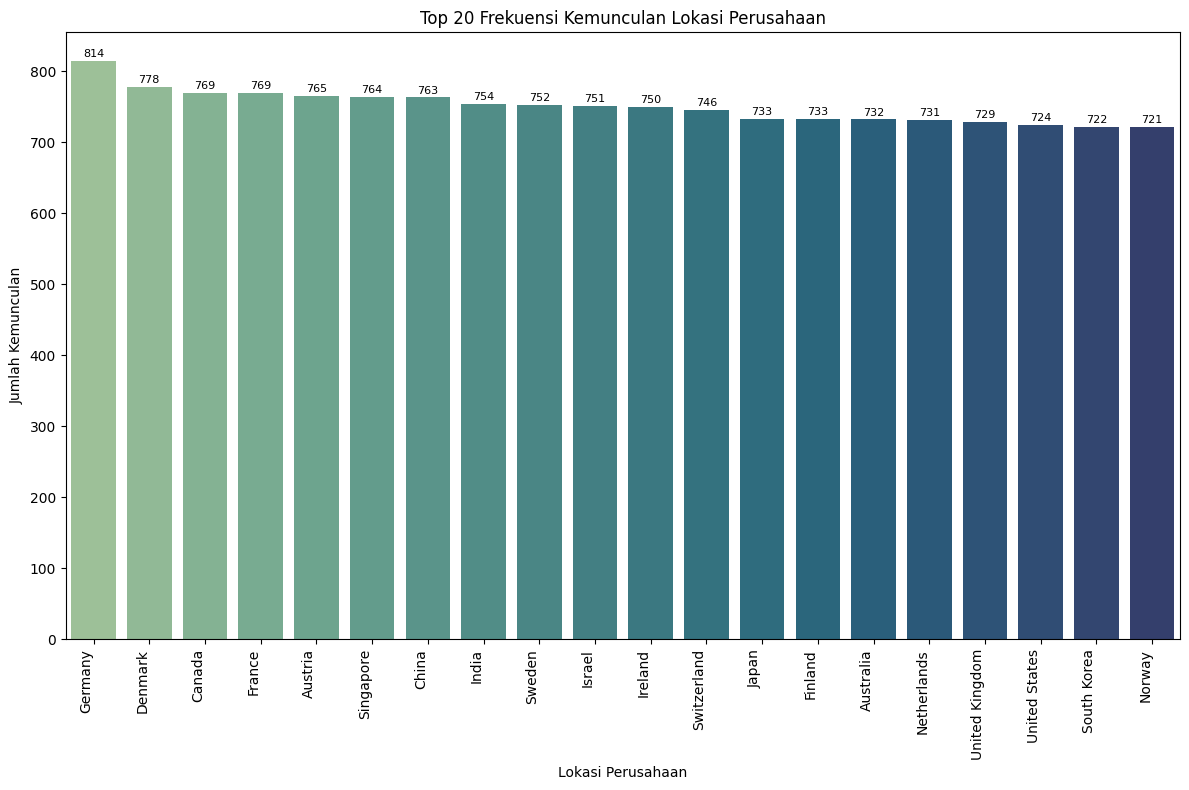

In [38]:
#plot
top_n_locations = 20
company_location_counts_top = company_location_counts.head(top_n_locations)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=company_location_counts_top.index, y=company_location_counts_top.values, palette='crest')

plt.title(f'Top {top_n_locations} Frekuensi Kemunculan Lokasi Perusahaan')
plt.xlabel('Lokasi Perusahaan')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.show()

Plot ini menampilkan 20 lokasi perusahaan teratas berdasarkan frekuensi kemunculan dalam dataset, dengan Jerman (Germany) sebagai lokasi yang paling sering muncul (814 kemunculan). Meskipun Jerman berada di posisi teratas, perbedaannya dengan lokasi-lokasi lain tidak terlalu besar—lokasi ke-20, Norway, tercatat sebanyak 721 kali. Hal ini menunjukkan bahwa distribusi lokasi cukup merata di antara negara-negara teratas, tanpa satu negara pun yang mendominasi secara ekstrem.

Daftar ini mencerminkan keragaman geografis yang luas, mencakup negara-negara dari Eropa, Asia, dan Amerika Utara, seperti Denmark, Prancis, Kanada, India, Jepang, dan Amerika Serikat. Jika dataset ini berkaitan dengan pasar kerja, keberagaman lokasi ini menunjukkan bahwa data mencakup pandangan global, bukan hanya terbatas pada satu wilayah. Dominasi relatif Jerman dapat menjadi catatan penting untuk analisis lebih lanjut, misalnya saat membandingkan jenis pekerjaan atau rata-rata gaji antar negara. Secara keseluruhan, visualisasi ini memberikan gambaran yang seimbang dan beragam mengenai persebaran lokasi perusahaan dalam dataset.


## Company size

In [47]:
# count company size
company_size_counts = df["company_size"].value_counts()
company_size_counts

,count
company_size,
S,5007
L,4998
M,4995


S: Small (Perusahaan Kecil)

L: Large (Perusahaan Besar)

M: Medium (Perusahaan Menengah)

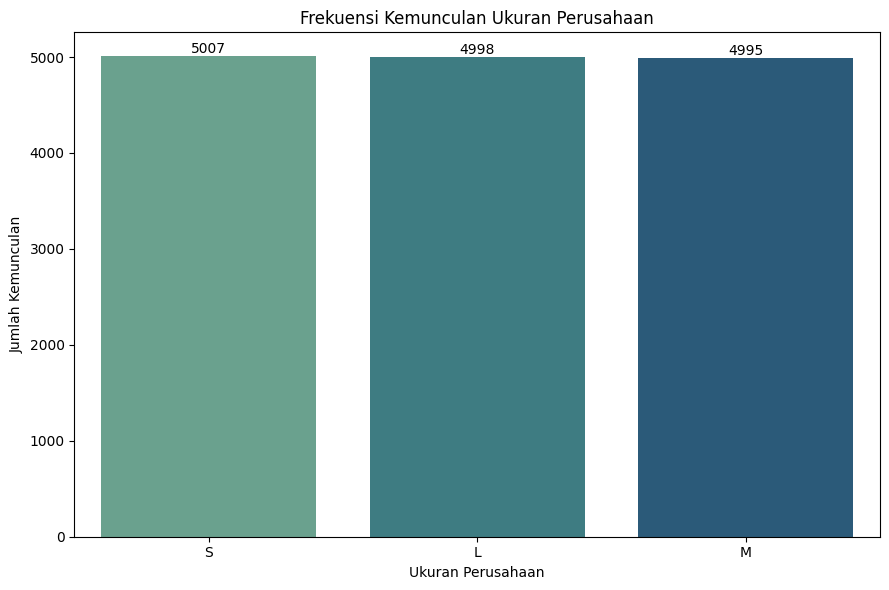

In [48]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette='crest')

plt.title('Frekuensi Kemunculan Ukuran Perusahaan')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=0)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.show()

Plot ini menunjukkan distribusi jumlah kemunculan dari tiga kategori ukuran perusahaan utama: **Small (5007)**, **Large (4998)**, dan **Medium (4995)**. Perbedaannya sangat kecil, hanya terpaut **12 entri** antara yang tertinggi dan terendah, sehingga distribusinya bisa dikatakan **sangat seimbang** atau hampir **uniform**. Tidak ada satu pun kategori yang mendominasi atau terlalu jarang muncul dalam dataset, yang artinya ketiga ukuran perusahaan memiliki representasi yang hampir setara.

Keseimbangan ini memberikan keuntungan analitis karena memungkinkan perbandingan yang adil antar kategori tanpa bias signifikan terhadap salah satu ukuran perusahaan. Dengan distribusi yang merata, analisis lebih lanjut—seperti perbandingan rata-rata gaji atau jenis pekerjaan berdasarkan ukuran perusahaan—dapat dilakukan secara **objektif**, tanpa perlu melakukan penyesuaian untuk ketidakseimbangan jumlah data.


## Company residence

In [50]:
# count employee residence
employee_residence_counts = df["employee_residence"].value_counts()
employee_residence_counts

,count
employee_residence,
Sweden,790
France,781
Denmark,777
Austria,776
India,772
Germany,769
South Korea,763
Canada,762
China,761


/tmp/ipython-input-51-308415633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=employee_residence_counts.index, y=employee_residence_counts.values, palette='mako')


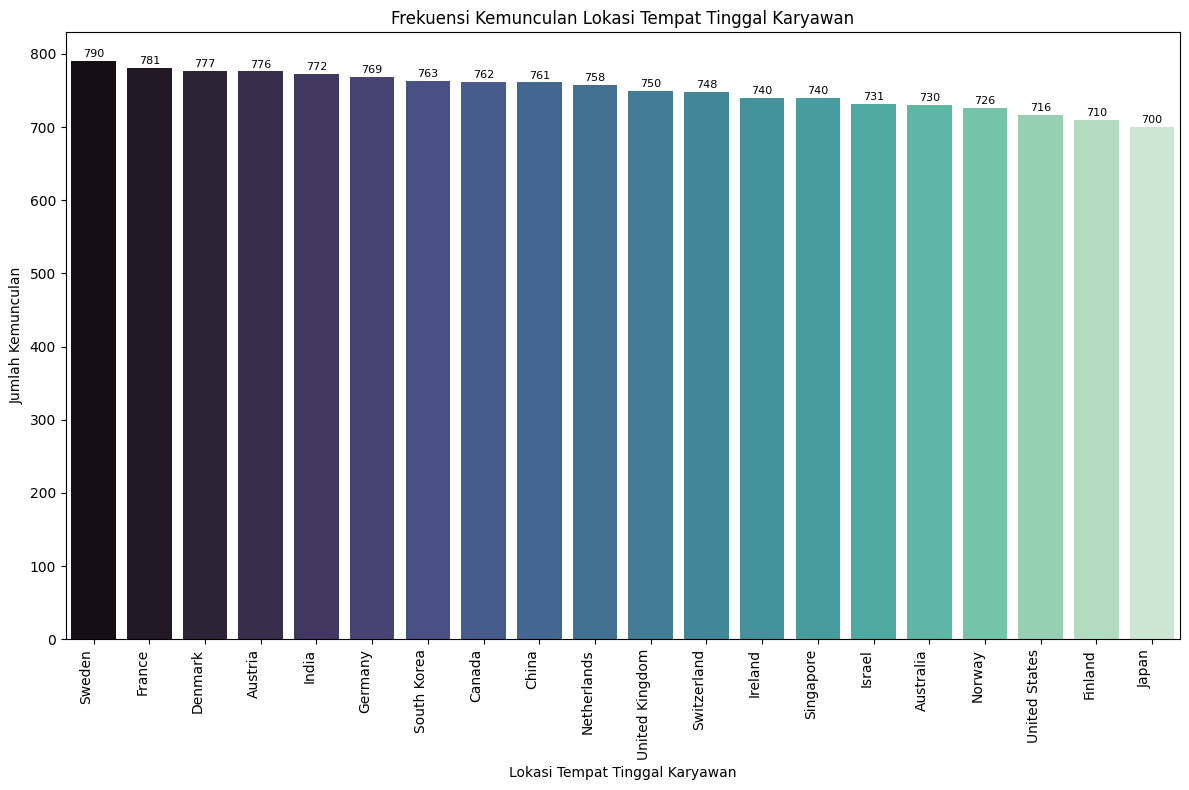

In [51]:
# plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=employee_residence_counts.index, y=employee_residence_counts.values, palette='mako')

plt.title(f'Frekuensi Kemunculan Lokasi Tempat Tinggal Karyawan')
plt.xlabel('Lokasi Tempat Tinggal Karyawan')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.show()

Plot ini menampilkan distribusi frekuensi kemunculan dari 20 negara tempat tinggal karyawan terbanyak dalam dataset. Swedia menjadi lokasi paling dominan dengan 790 karyawan, diikuti oleh negara-negara lain dengan selisih yang relatif kecil—lokasi ke-20 (Jepang) memiliki 700 kemunculan. Rentang selisih hanya 90 menunjukkan bahwa distribusi sangat merata, tanpa adanya dominasi yang mencolok dari satu negara pun. Visualisasi ini memberikan gambaran seimbang terkait persebaran asal geografis para karyawan dalam dataset.

Negara-negara yang masuk daftar berasal dari berbagai kawasan dunia, seperti Eropa, Asia, Amerika Utara, dan Oseania, mencerminkan cakupan global dari data karyawan. Keberagaman ini penting karena menunjukkan bahwa dataset Anda tidak terbatas pada satu wilayah, melainkan merepresentasikan perspektif internasional.

## Remote ratio

In [52]:
# Count ratio ( disini saya menggunakan count karena ini perbandingannya persen )
remote_ratio_counts = df["remote_ratio"].value_counts()
remote_ratio_counts

,count
remote_ratio,
0,5075
50,5005
100,4920


0: Pekerjaan on-site penuh (tidak remote).

50: Pekerjaan hybrid (sebagian remote, sebagian on-site).

100: Pekerjaan sepenuhnya remote

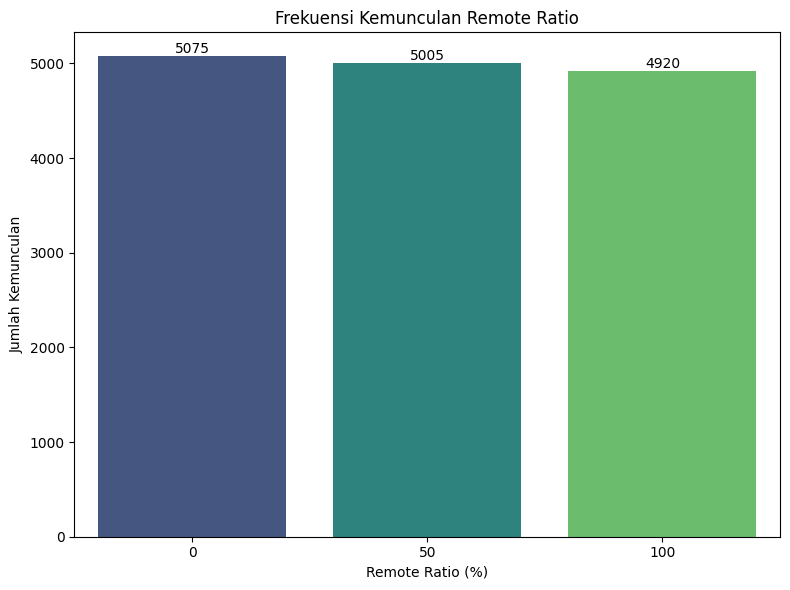

In [53]:
# plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values, palette='viridis')

plt.title('Frekuensi Kemunculan Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=0)
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.show()

Plot ini menunjukkan distribusi jumlah pekerjaan berdasarkan tingkat kerja remote, dengan tiga kategori utama: On-site (0%), Hybrid (50%), dan Full Remote (100%). Kategori On-site memiliki jumlah tertinggi (5075), disusul Hybrid (5005) dan Full Remote (4920). Meskipun terdapat urutan, perbedaannya sangat kecil—hanya 155 entri antara kategori tertinggi dan terendah—yang menunjukkan bahwa ketiga model kerja ini memiliki representasi yang hampir seimbang dalam dataset.

Keseimbangan ini mencerminkan fleksibilitas kerja yang merata, di mana peluang untuk bekerja secara on-site, hybrid, maupun remote tersedia secara proporsional.